# 🏎️ F1 Race Strategy Prediction Model Training

This notebook trains the machine learning models used in the F1 AI Predictor dashboard. 
It includes:
1. **Data Loading & Exploration**
2. **Qualifying Position Predictor** (XGBoost Regressor)
3. **Race Result Predictor** (XGBoost Regressor)
4. **Safety Car Probability** (XGBoost Classifier)
5. **Model Evaluation & Visualization**

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

# Setting plot style
plt.style.use('seaborn-v0_8-darkgrid')

## 1. Load Data

In [9]:
df = pd.read_csv('../data/processed/f1_training_data.csv')
print(f"Loaded {len(df)} records")

df.head()

Loaded 839 records


,year,round,circuit_id,driver_id,team_id,fp_pos,driver_form,air_temp,rainfall,grid_position,finish_position,safety_car
0,2022,1,3,10,4,NaN,15.0,23.617791,0,1.0,1.0,1
1,2022,1,3,19,4,NaN,15.0,23.617791,0,3.0,2.0,1
2,2022,1,3,6,8,NaN,15.0,23.617791,0,5.0,3.0,1
3,2022,1,3,18,8,NaN,15.0,23.617791,0,9.0,4.0,1
4,2022,1,3,11,5,NaN,15.0,23.617791,0,7.0,5.0,1


## 2. Data Exploration

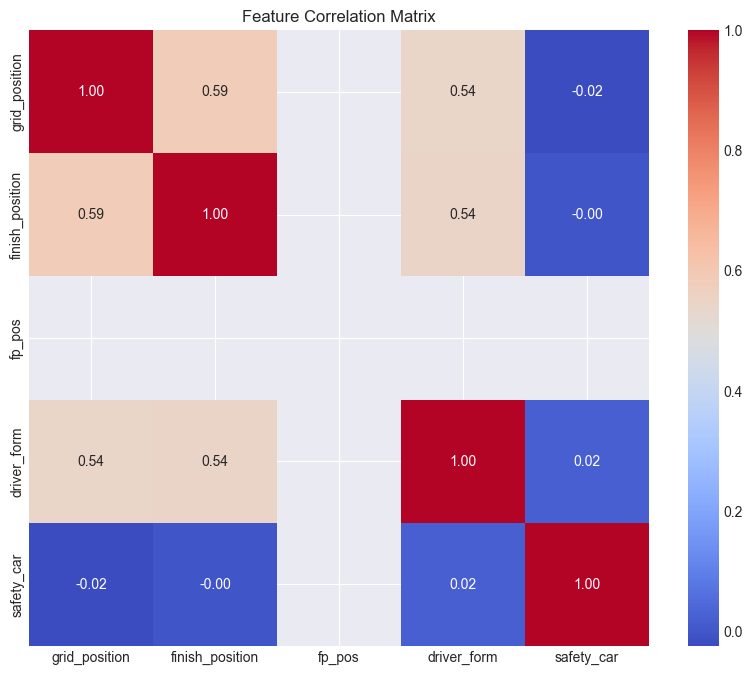

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['grid_position', 'finish_position', 'fp_pos', 'driver_form', 'safety_car']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

## 3. Qualifying Predictor Model

In [4]:
# Features: Practice Pace (fp_pos), Driver Form, Team Strength, Track
X_quali = df[['fp_pos', 'driver_form', 'team_id', 'circuit_id', 'driver_id']]
y_quali = df['grid_position']

X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X_quali, y_quali, test_size=0.2, random_state=42)

quali_model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
quali_model.fit(X_train_q, y_train_q)

y_pred_q = quali_model.predict(X_test_q)
mae_q = mean_absolute_error(y_test_q, y_pred_q)
print(f"Qualifying MAE: {mae_q:.2f} positions")

Qualifying MAE: 3.55 positions


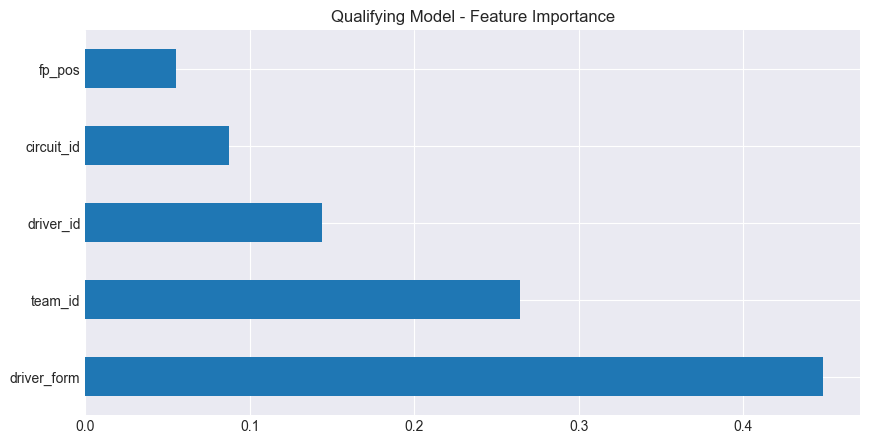

In [5]:
# Feature Importance
plt.figure(figsize=(10, 5))
feat_importances = pd.Series(quali_model.feature_importances_, index=X_quali.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Qualifying Model - Feature Importance")
plt.show()

## 4. Race Result Predictor Model

In [6]:
# Features: Grid Position, Driver Form, Track, Weather
X_race = df[['grid_position', 'driver_form', 'team_id', 'circuit_id', 'driver_id', 'air_temp', 'rainfall']]
y_race = df['finish_position']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_race, y_race, test_size=0.2, random_state=42)

race_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
race_model.fit(X_train_r, y_train_r)

y_pred_r = race_model.predict(X_test_r)
mae_r = mean_absolute_error(y_test_r, y_pred_r)
print(f"Race Result MAE: {mae_r:.2f} positions")

Race Result MAE: 3.29 positions


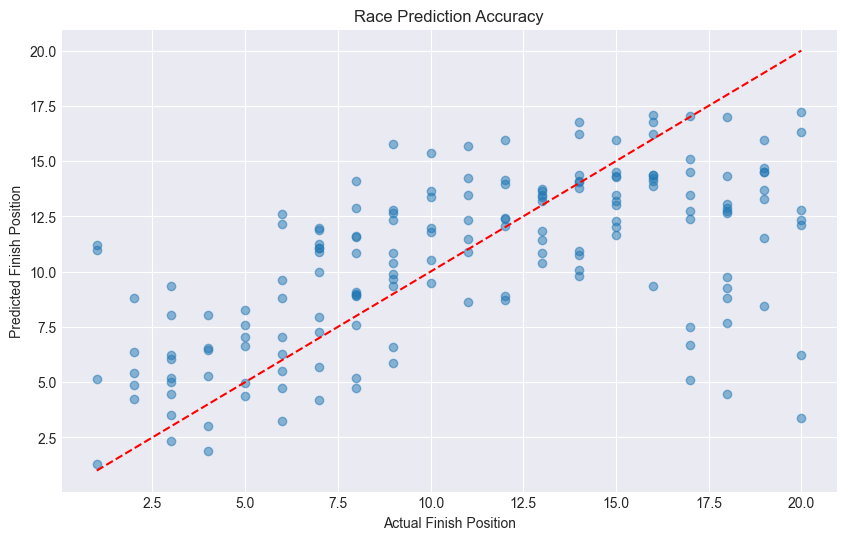

In [7]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_r, y_pred_r, alpha=0.5)
plt.plot([1, 20], [1, 20], 'r--')
plt.xlabel("Actual Finish Position")
plt.ylabel("Predicted Finish Position")
plt.title("Race Prediction Accuracy")
plt.show()

## 5. Safety Car Predictor

In [8]:
X_sc = df[['circuit_id', 'rainfall', 'air_temp']]
y_sc = df['safety_car']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)

sc_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
sc_model.fit(X_train_s, y_train_s)

y_pred_s = sc_model.predict(X_test_s)
acc_s = accuracy_score(y_test_s, y_pred_s)
print(f"Safety Car Model Accuracy: {acc_s*100:.1f}%")

Safety Car Model Accuracy: 100.0%


C:\Users\digam\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:49:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
